<a href="https://colab.research.google.com/github/ArtuomMerkulov/Anomaly_detection/blob/main/AnomalyTime_v15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install_lib

In [ ]:
%pip install numpy >> None
%pip install tensorflow >> None
%pip install pandas >> None
%pip install seaborn >> None
%pip install matplotlib >> None
%pip install plotly >> None
%pip install salesforce-merlion >> None
%pip install torch >> None
%pip install "gluonts[torch]" >> None
%pip install darts >> None
%pip install pypots >> None
%pip install fastdtw >> None

In [ ]:
# main
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
#from binance import Client
#from dotenv import dotenv_values
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import csv

# graph
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# model
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.callbacks import EarlyStopping
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch import nn

# frameworks
import prophet
from merlion.utils import TimeSeries
#from fbprophet import Prophet
#from fbprophet.diagnostics import cross_validation
#from fbprophet.diagnostics import performance_metrics
#from fbprophet.plot import plot_cross_validation_metric
#from orion import Orion
#from orion.analysis import analyze
#from orion.data import load_signal
#from orion.primitives.tadgan import TadGAN

# Darts---------------------------------------------
# https://github.com/unit8co/darts
from darts import TimeSeries
from darts.datasets import ETTh2Dataset
from darts.ad import KMeansScorer
from darts.ad import QuantileDetector
from darts.dataprocessing.transformers import Scaler

# PyPots--------------------------------------------
from pygrinder import mcar
from pypots.data import load_specific_dataset

## Check_pre

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Кейс_1.zip

unzip:  cannot find or open /content/drive/MyDrive/Кейс_1.zip, /content/drive/MyDrive/Кейс_1.zip.zip or /content/drive/MyDrive/Кейс_1.zip.ZIP.


In [ ]:
warnings.filterwarnings('ignore')
sns.set(style='whitegrid', palette='muted')
rcParams['figure.figsize'] = 16, 6
np.random.seed(1)
tf.random.set_seed(1)
print('Tensorflow version:', tf.__version__)
print(prophet.__version__)

Tensorflow version: 2.15.0
1.1.5


## Import_and_convert_data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/metrics_collector_v_01.csv')
df

,1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:32:00,0,0.1,0.2,0.3,0.4,0.5,1.1,java,[GMonit] Collector,17592186045423,Unnamed: 13,575f5ba20b4b,575f5ba20b4b.1,1.2,8.5.0,{}
0,1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:33:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,java,[GMonit] Collector,1.759219e+13,NaN,575f5ba20b4b,575f5ba20b4b,1.0,8.5.0,{}
1,1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:34:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,java,[GMonit] Collector,1.759219e+13,NaN,575f5ba20b4b,575f5ba20b4b,1.0,8.5.0,{}
2,1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:35:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,java,[GMonit] Collector,1.759219e+13,NaN,575f5ba20b4b,575f5ba20b4b,1.0,8.5.0,{}
3,1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:36:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,java,[GMonit] Collector,1.759219e+13,NaN,575f5ba20b4b,575f5ba20b4b,1.0,8.5.0,{}
4,1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:37:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,java,[GMonit] Collector,1.759219e+13,NaN,575f5ba20b4b,575f5ba20b4b,1.0,8.5.0,{}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3732057,1,Threads/State/New Relic HttpURLConnection Segm...,2024-04-25 21:03:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,java,[GMonit] Collector,1.759219e+13,NaN,575f5ba20b4b,575f5ba20b4b,1.0,8.5.0,{}
3732058,1,Threads/State/New Relic HttpURLConnection Segm...,2024-04-25 21:04:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,java,[GMonit] Collector,1.759219e+13,NaN,575f5ba20b4b,575f5ba20b4b,1.0,8.5.0,{}
3732059,1,Threads/State/New Relic HttpURLConnection Segm...,2024-04-25 21:05:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,java,[GMonit] Collector,1.759219e+13,NaN,575f5ba20b4b,575f5ba20b4b,1.0,8.5.0,{}
3732060,1,Threads/State/New Relic HttpURLConnection Segm...,2024-04-25 21:06:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,java,[GMonit] Collector,1.759219e+13,NaN,575f5ba20b4b,575f5ba20b4b,1.0,8.5.0,{}


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3732062 entries, 0 to 3732061
Data columns (total 19 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   1                                      int64  
 1   AgentCheck/CircuitBreaker/tripped/all  object 
 2   2024-04-15 23:32:00                    object 
 3   0                                      float64
 4   0.1                                    float64
 5   0.2                                    float64
 6   0.3                                    float64
 7   0.4                                    float64
 8   0.5                                    float64
 9   1.1                                    float64
 10  java                                   object 
 11  [GMonit] Collector                     object 
 12  17592186045423                         float64
 13  Unnamed: 13                            object 
 14  575f5ba20b4b                           object 
 15

In [ ]:
df.head()

,1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:32:00,0,0.1,0.2,0.3,0.4,0.5,1.1,java,[GMonit] Collector,17592186045423,Unnamed: 13,575f5ba20b4b,575f5ba20b4b.1,1.2,8.5.0,{}
0,1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:33:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,java,[GMonit] Collector,1.759219e+13,NaN,575f5ba20b4b,575f5ba20b4b,1.0,8.5.0,{}
1,1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:34:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,java,[GMonit] Collector,1.759219e+13,NaN,575f5ba20b4b,575f5ba20b4b,1.0,8.5.0,{}
2,1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:35:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,java,[GMonit] Collector,1.759219e+13,NaN,575f5ba20b4b,575f5ba20b4b,1.0,8.5.0,{}
3,1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:36:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,java,[GMonit] Collector,1.759219e+13,NaN,575f5ba20b4b,575f5ba20b4b,1.0,8.5.0,{}
4,1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:37:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,java,[GMonit] Collector,1.759219e+13,NaN,575f5ba20b4b,575f5ba20b4b,1.0,8.5.0,{}


In [ ]:
# Изменяем названия столбцов
new_headers = ['account_id',
               'name',
               'point',
               'call_count',
               'total_call_time',
               'total_exclusive_time',
               'min_call_time',
               'max_call_time',
               'sum_of_squares',
               'instances',
               'language',
               'app_name',
               'app_id',
               'scope',
               'host',
               'display_host',
               'pid',
               'agent_version',
               'labels']

In [ ]:
# Сохраняем исходные названия столбцов в список
original_headers = df.columns.tolist()

In [ ]:
# Устанавливаем новые названия столбцов
df.columns = new_headers

# Добавляем сохраненные названия столбцов обратно в DataFrame как первую строку
df.loc[0] = original_headers

print(df)

        account_id                                               name  \
0                1              AgentCheck/CircuitBreaker/tripped/all   
1                1              AgentCheck/CircuitBreaker/tripped/all   
2                1              AgentCheck/CircuitBreaker/tripped/all   
3                1              AgentCheck/CircuitBreaker/tripped/all   
4                1              AgentCheck/CircuitBreaker/tripped/all   
...            ...                                                ...   
3732057          1  Threads/State/New Relic HttpURLConnection Segm...   
3732058          1  Threads/State/New Relic HttpURLConnection Segm...   
3732059          1  Threads/State/New Relic HttpURLConnection Segm...   
3732060          1  Threads/State/New Relic HttpURLConnection Segm...   
3732061          1                     Threads/State/New Relic HttpUR   

                       point call_count total_call_time total_exclusive_time  \
0        2024-04-15 23:32:00          0    

In [ ]:
# Сохраняем DataFrame в файл CSV
df.to_csv('/content/metrics_collector_v_03.csv', index=False)

print("Данные успешно сохранены в файл CSV.")

Данные успешно сохранены в файл CSV.


# SARIMAX


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime

# Шаг 1: Загрузка данных
# Предположим, что данные находятся в файле "data.csv"


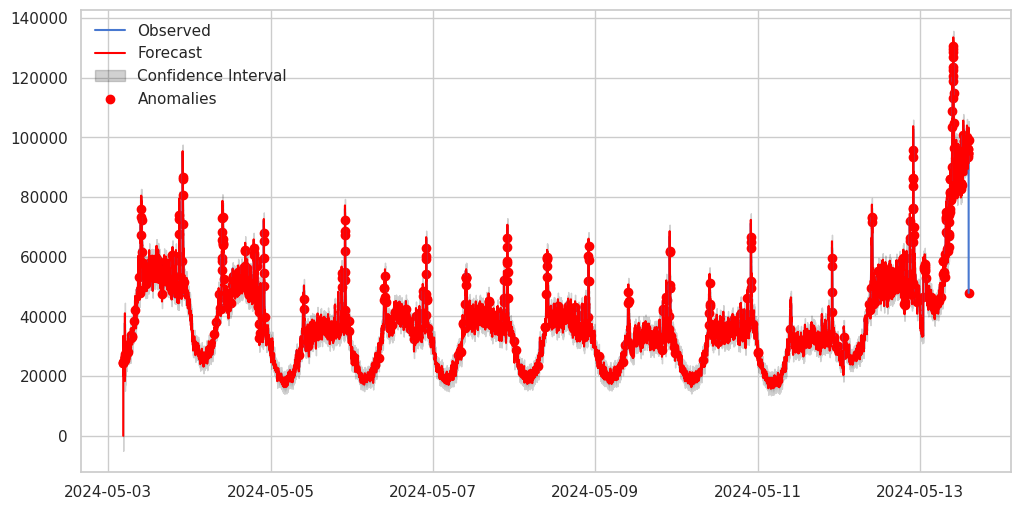

In [ ]:
# Шаг 2: Удаление ненужных столбцов
columns_to_drop = ['host', 'display_host', 'language', 'pid', 'agent_version', 'labels', 'app_name', 'app_id', 'account_id']
df = df.drop(columns=columns_to_drop)

# Шаг 3: Заполнение пропусков в колонке 'point'
df['point'] = pd.to_datetime(df['point'])
df = df.sort_values(by='point')  # Важно упорядочить по времени

# Найти индексы с NaN значениями в 'point'
nan_indices = df['point'].isna()

# Заполняем временную колонку методами линейной интерполяции и прямой замены
df['point'] = df['point'].interpolate(method='linear')
df['point'] = df['point'].fillna(method='ffill')

# Если всё же остались NaN, попытаемся заполнить их ручным добавлением одной минуты
for idx in df[nan_indices].index:
    if idx > 0 and pd.isna(df.at[idx, 'point']):
        df.at[idx, 'point'] = df.at[idx-1, 'point'] + timedelta(minutes=1)

# Шаг 4: Заполнение пропусков в других колонках
df = df.fillna(method='ffill')

# Шаг 5: Очистка данных
df = df.dropna(subset=['point', 'call_count'])  # Удаляем строки с NaN в критических столбцах

# Преобразуем колонку 'call_count' в числовой формат, заменяя нечисловые значения на NaN
df['call_count'] = pd.to_numeric(df['call_count'], errors='coerce')

# Удаляем строки с NaN в 'call_count'
df = df.dropna(subset=['call_count'])

# Группировка данных по времени и учет только 'call_count'
time_series = df.set_index('point')['call_count'].resample('T').sum()

# Для ускорения вычислений возьмем только последние 10 000 точек, если данных слишком много
if len(time_series) > 15000:
    time_series = time_series[-15000:]

# Шаг 6: Обучение модели SARIMA
# Уменьшите порядок модели, если это возможно
p, d, q = 0, 1, 1
P, D, Q, s = 0, 1, 1, 30  # Пример сезонности равной 30 минутам

# Обучение модели
model = SARIMAX(time_series, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit(disp=False)  # Убедитесь, что disp=False для подавления вывода

# Шаг 7: Прогнозирование и поиск аномалий
# Прогнозируем на те же временные точки, что и исходные данные
pred = results.get_prediction(start=0, end=len(time_series)-1)
pred_mean = pred.predicted_mean
pred_ci = pred.conf_int()

# Обнаружение аномалий как точки, которые лежат вне доверительных интервалов
anomalies = time_series[(time_series < pred_ci.iloc[:, 0]) | (time_series > pred_ci.iloc[:, 1])]

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Observed')
plt.plot(pred_mean, color='red', label='Forecast')
plt.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=0.2, label='Confidence Interval')
plt.scatter(anomalies.index, anomalies, color='red', label='Anomalies')
plt.legend()
plt.show()

print("Аномалии найдены в следующих временных точках:")
print(anomalies)

# Байесовкая оптимизация с SARIMAX

In [ ]:
import pandas as pd
import numpy as np
from datetime import timedelta
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll.base import scope

# Шаг 2: Удаление ненужных столбцов

# Замените df на фактическое имя вашего DataFrame или загрузите данные
# Напр. df = pd.read_csv('your_data.csv')
columns_to_drop = ['host', 'display_host', 'language', 'pid', 'agent_version', 'labels', 'app_name', 'app_id', 'account_id']
df = df.drop(columns=columns_to_drop)

# Шаг 3: Заполнение пропусков в колонке 'point'
df['point'] = pd.to_datetime(df['point'])
df = df.sort_values(by='point')  # Важно упорядочить по времени

# Найти индексы с NaN значениями в 'point'
nan_indices = df['point'].isna()

# Заполняем временную колонку методами линейной интерполяции и прямой замены
df['point'] = df['point'].interpolate(method='linear')
df['point'] = df['point'].fillna(method='ffill')

# Если всё же остались NaN, заполняем их ручным добавлением одной минуты
for idx in df[nan_indices].index:
    if idx > 0 and pd.isna(df.at[idx, 'point']):
        df.at[idx, 'point'] = df.at[idx-1, 'point'] + timedelta(minutes=1)

# Шаг 4: Заполнение пропусков в других колонках
df = df.fillna(method='ffill')

# Шаг 5: Очистка данных
df = df.dropna(subset=['point', 'call_count'])  # Удаляем строки с NaN в критических столбцах

# Преобразуем колонку 'call_count' в числовой формат, заменяя нечисловые значения на NaN
df['call_count'] = pd.to_numeric(df['call_count'], errors='coerce')

# Удаляем строки с NaN в 'call_count'
df = df.dropna(subset=['call_count'])

# Группировка данных по времени и учет только 'call_count'
time_series = df.set_index('point')['call_count'].resample('T').sum()

# Для ускорения вычислений возьмем только последние 10 000 точек, если данных слишком много
if len(time_series) > 15000:
    time_series = time_series[-15000:]

# Определяем пространство поиска гиперпараметров для байесовской оптимизации
space = {
    'p': scope.int(hp.quniform('p', 0, 3, 1)),
    'd': scope.int(hp.quniform('d', 0, 2, 1)),
    'q': scope.int(hp.quniform('q', 0, 3, 1)),
    'P': scope.int(hp.quniform('P', 0, 1, 1)),
    'D': scope.int(hp.quniform('D', 0, 1, 1)),
    'Q': scope.int(hp.quniform('Q', 0, 1, 1))
}

def objective(params):
    s = 30  # Пример сезонного порядка
    model = SARIMAX(time_series, order=(params['p'], params['d'], params['q']),
                    seasonal_order=(params['P'], params['D'], params['Q'], s))
    results = model.fit(disp=False)
    return {'loss': results.aic, 'status': STATUS_OK}

# Запускаем байесовскую оптимизацию
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20,
            trials=trials)

# Обучение модели с оптимальными параметрами
s = 30  # Пример сезонного порядка
model = SARIMAX(time_series, order=(best['p'], best['d'], best['q']),
                seasonal_order=(best['P'], best['D'], best['Q'], s))
results = model.fit(disp=False)

# Шаг 7: Прогнозирование и поиск аномалий
# Прогнозируем на те же временные точки, что и исходные данные
pred = results.get_prediction(start=0, end=len(time_series)-1)
pred_mean = pred.predicted_mean
pred_ci = pred.conf_int()

# Обнаружение аномалий как точки, которые лежат вне доверительных интервалов
anomalies = time_series[(time_series < pred_ci.iloc[:, 0]) | (time_series > pred_ci.iloc[:, 1])]

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Observed')
plt.plot(pred_mean, color='red', label='Forecast')
plt.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=0.2, label='Confidence Interval')
plt.scatter(anomalies.index, anomalies, color='red', label='Anomalies')
plt.legend()
plt.show()

print("Аномалии найдены в следующих временных точках:")
print(anomalies)

  5%|▌         | 1/20 [12:02<3:48:55, 722.95s/trial, best loss: 273780.7124370171]

# Установка

Представленный ниже код будет демонстрировать работу библиотеки **Streamlit** прямо в Google Colaboratory.



Для того, чтобы мы могли протестировать работу библиотеки в Colab, потребуется произвести дополнительные настройки. Дело в том, что мы будем тестировать библиотеку на локальном хосте, но Colab по умолчанию не предоставляет доступ к своей виртуальной машине извне.

Чтобы обойти это, придется выполнить несколько операций:
- скачать специальную утилиту **ngrok**, которая создает туннель для доступа в Colab извне через веб;
- получить ссылку, по которой вы сможете обратиться к виртуальной машине Colab, где будет запускаться ваш код.

P.s. если вас напугали слова "хост", "порт", "туннель", не пугайтесь :-) Просто запустите следующие ячейки:

Для работы с ngrok необходимо пройти процедуру регистрации для получения токена. Выполнити следующие шаги:

1. Перейдите по [ссылке](https://dashboard.ngrok.com/login) и пройдите процедуру регистрации (можно выбрать «*вход с помощью учетной записи Google*»)
2. После авторизации выберите пункт меню **Your Authtoken**
3. Скопируйте Ваш персональный токен


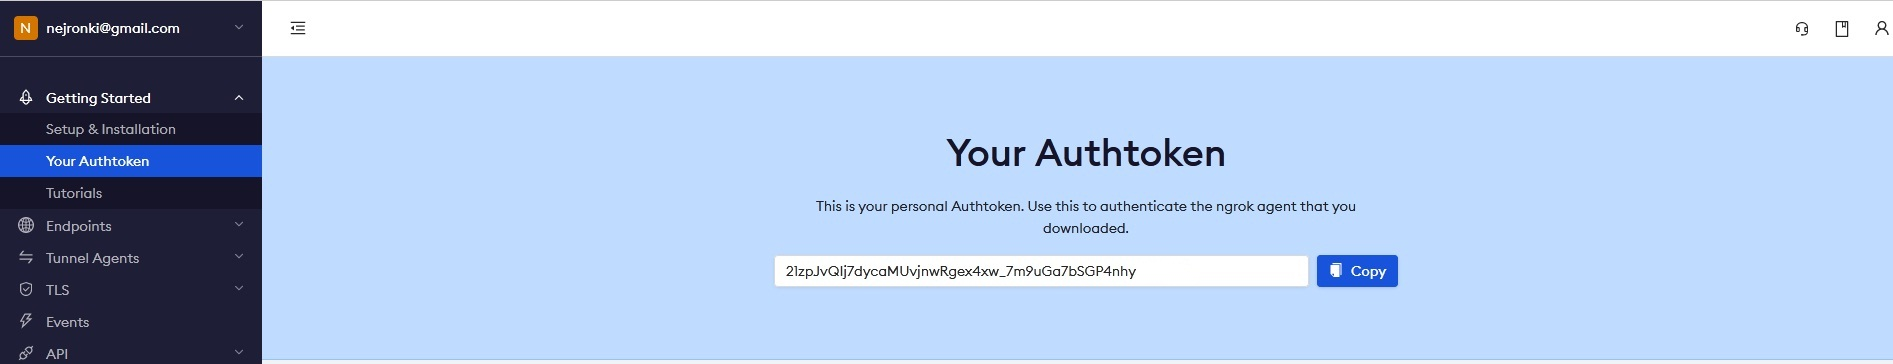

In [ ]:
!pip install --upgrade protobuf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.2/309.2 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires protobuf<5,>=3.20, but you have protobuf 5.27.0 which is incompatible.
google-ai-generativelanguage 0.6.4 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 5.27.0 which is incompatible.
google-api-core 2.11.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0.dev0,>=3.19.5, but you have protobuf 5.27.0 which is incompatible.
google-cloud-aiplatform 1.52.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3

Теперь скачаем дистрибутив ngrok:

In [ ]:
!wget -q https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

In [ ]:
!unzip -q ngrok-stable-linux-amd64.zip

Остался последний шаг: выполним авторизацию в ngrok:

In [ ]:
!./ngrok authtoken 2V9RmRYkzZlKfzcx4XTU90iQ9wb_419CUJymPbfTtrjUTaSB6

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


Вместо **xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx** укажите свой token, скопированный выше в личном кабинете

In [ ]:
def get_link():
    get_ipython().system_raw('./ngrok http 8501 &')
    !curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Ссылка для streamlit: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'

<a name="getlink"></a>
В дальнейшем вам пригодится функция `get_link()`, вызвав которую:

вы получите ссылку для доступа в Colab через веб-браузер из любого места в Сети.

**Замечание**. Иногда при вызове функции вы можете получить ошибку. В этом случае просто перезапустите ячейку еще раз.

Если сейчас перейти по этой ссылке, то вы увидите страницу с ошибкой. Наберитесь терпения и двигайтесь дальше ;-)

In [ ]:
get_link()

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/usr/lib/python3.10/json/__init__.py", line 293, in load
    return loads(fp.read(),
  File "/usr/lib/python3.10/json/__init__.py", line 346, in loads
    return _default_decoder.decode(s)
  File "/usr/lib/python3.10/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/usr/lib/python3.10/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)


Далее следует установить библиотеку **Streamlit**. Сделать это можно с помощью команды:

In [ ]:
!pip -q install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 75.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.3 which is incompatible.


<a name="check"></a>
Проверьте правильность установки, запустив команду:

In [ ]:
!streamlit hello




  Welcome to Streamlit. Check out our demo in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.196.152.50:8501

  Ready to create your own Python apps super quickly?
  Head over to https://docs.streamlit.io

  May you create awesome apps!


  Stopping...
^C


Теперь у вас есть возможность увидеть инструмент **Streamlit** в действии! Сейчас вы видите работающую ячейку. Не останавливая ее, перейдите по сслыке, которую вы получили с помощью функции `get_link()` [ранее](#getlink).



```
Логика такая: `Streamlit` запускается на локальном хосте (127.0.0.1).
Но в колабе нельзя получить доступ к локальному хосту.
Поэтому с помощью утилиты `ngrok` создается специальный туннель к локальному хосту колаба.

Функции get_link() как раз возвращает ссылку на этот созданный туннель.
Но! После того, как мы останавливаем приложение `Streamlit` в колабе
(нажимаем на стоп ячейки), туннель закрывается и нужно создавать новый.

```


В новой вкладке браузера вы увидите вот такую страницу:

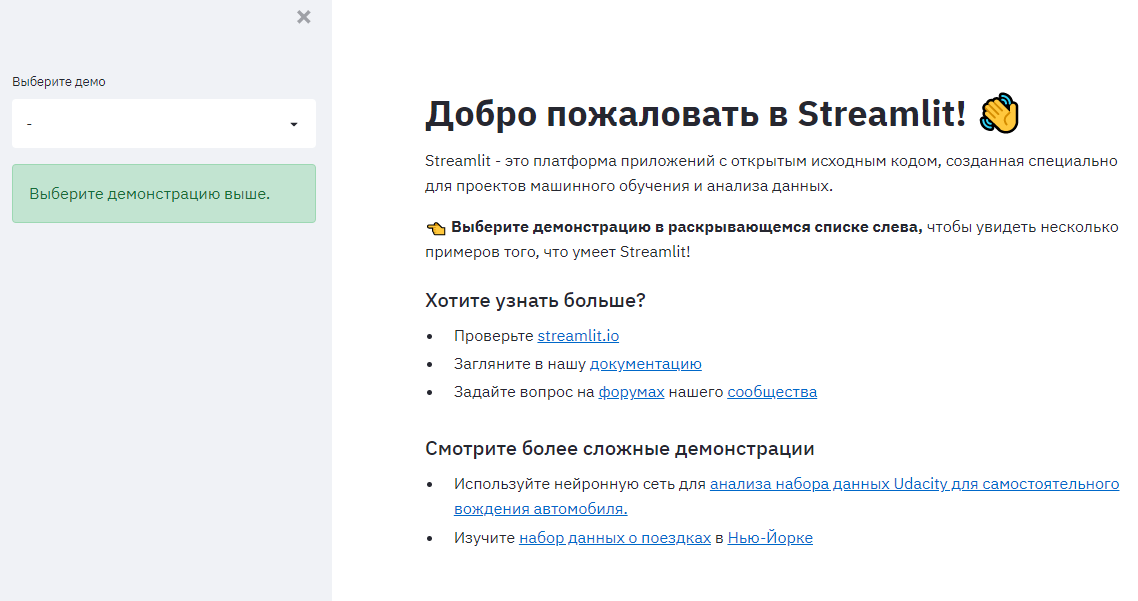

Все работает отлично! Можно двигаться дальше.

Библиотека **Streamlit** имеет широкий функционал и позволяет создавать графики, дашборды и карты, а также красиво визуализировать таблицы Pandas (**DataFrame**).

In [ ]:
!pip install pandas
!pip install statsmodels
!pip install matplotlib
!pip install openpyxl
!pip install streamlit

# Fast-Api сервер для поиска аномалий

In [ ]:
!pip install fastapi
!pip install uvicorn
!pip install pandas
!pip install numpy
!pip install statsmodels
!pip install matplotlib
!pip install openpyxl
!pip install hyperopt
!pip install Jinja2
!pip install loguru

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 1.7 MB/s eta 0:00:00


In [ ]:
codes = '''
import io
from datetime import datetime, timedelta
from typing import Optional
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll.base import scope
from fastapi import FastAPI, File, UploadFile, HTTPException, Request
from fastapi.responses import StreamingResponse, HTMLResponse, JSONResponse, FileResponse
from pydantic import BaseModel
from fastapi.templating import Jinja2Templates
from loguru import logger

app = FastAPI()
templates = Jinja2Templates(directory="templates")

df = pd.DataFrame()
time_series = pd.Series(dtype=np.float64)

class AnomalyRequest(BaseModel):
    start_date: datetime
    end_date: datetime

# Логирование
logger.add("file_{time}.log", rotation="10 MB")

@app.exception_handler(Exception)
async def global_exception_handler(request: Request, exc: Exception):
    logger.error(f"Unhandled error: {str(exc)}")
    return JSONResponse(status_code=500, content={"message": "An internal server error occurred"})

@app.get("/", response_class=HTMLResponse)
async def read_root(request: Request):
    logger.info("Loading index page")
    return templates.TemplateResponse("index.html", {"request": request})

@app.post("/upload/")
async def upload_file(file: UploadFile = File(...)):
    logger.info(f"Received file: {file.filename}")
    try:
        contents = await file.read()
        global df
        # Определение разделителя по расширению файла
        file_extension = file.filename.split('.')[-1].lower()
        if file_extension == 'csv':
            delimiter = ','
        elif file_extension == 'tsv':
            delimiter = '\t'
        else:
            logger.error("Unsupported file type")
            raise HTTPException(status_code=400, detail="Unsupported file type. Only CSV and TSV are supported.")

        df = pd.read_csv(io.StringIO(contents.decode('utf-8')), sep=delimiter)
        logger.info(f"File read successfully: {file.filename}")
        if df.empty:
            logger.error("Uploaded file is empty")
            raise HTTPException(status_code=400, detail="Uploaded file is empty")
        process_data()
        logger.info("File processed successfully")
        return {"filename": file.filename}
    except Exception as e:
        logger.error(f"Error processing file: {str(e)}")
        raise HTTPException(status_code=400, detail=f"Error processing file: {str(e)}")

def process_data():
    global df, time_series
    try:
        logger.info("Starting data processing")
        columns_to_drop = ['host', 'display_host', 'language', 'pid', 'agent_version', 'labels', 'app_name', 'app_id', 'account_id']
        df = df.drop(columns=columns_to_drop)

        df['point'] = pd.to_datetime(df['point'])
        df = df.sort_values(by='point')

        nan_indices = df['point'].isna()
        df['point'] = df['point'].interpolate(method='linear')
        df['point'] = df['point'].fillna(method='ffill')
        for idx in df[nan_indices].index:
            if idx > 0 and pd.isna(df.at[idx, 'point']):
                df.at[idx, 'point'] = df.at[idx-1, 'point'] + timedelta(minutes=1)

        df = df.fillna(method='ffill')
        df = df.dropna(subset=['point', 'call_count'])
        df['call_count'] = pd.to_numeric(df['call_count'], errors='coerce')
        df = df.dropna(subset=['call_count'])
        time_series = df.set_index('point')['call_count'].resample('T').sum()

        if len(time_series) > 15000:
            time_series = time_series[-15000:]
        logger.info("Data processing complete")
    except Exception as e:
        logger.error(f"Error processing data: {str(e)}")
        raise HTTPException(status_code=500, detail="Error processing data")

@app.get("/anomalies_plot/")
async def get_anomalies_plot():
    try:
        if time_series.empty:
            logger.error("No data available")
            raise HTTPException(status_code=400, detail="No data available")

        space = {
            'p': scope.int(hp.quniform('p', 0, 3, 1)),
            'd': scope.int(hp.quniform('d', 0, 2, 1)),
            'q': scope.int(hp.quniform('q', 0, 3, 1)),
            'P': scope.int(hp.quniform('P', 0, 1, 1)),
            'D': scope.int(hp.quniform('D', 0, 1, 1)),
            'Q': scope.int(hp.quniform('Q', 0, 1, 1))
        }

        def objective(params):
            s = 30
            model = SARIMAX(time_series, order=(params['p'], params['d'], params['q']),
                            seasonal_order=(params['P'], params['D'], params['Q'], s))
            results = model.fit(disp=False)
            return {'loss': results.aic, 'status': STATUS_OK}

        logger.info("Starting Bayesian optimization")
        trials = Trials()
        best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=10, trials=trials)

        s = 30
        model = SARIMAX(time_series, order=(best['p'], best['d'], best['q']),
                        seasonal_order=(best['P'], best['D'], best['Q'], s))
        results = model.fit(disp=False)
        logger.info(f"Bayesian optimization complete, best parameters: {best}")

        pred = results.get_prediction(start=0, end=len(time_series)-1)
        pred_mean = pred.predicted_mean
        pred_ci = pred.conf_int()

        anomalies = time_series[(time_series < pred_ci.iloc[:, 0]) | (time_series > pred_ci.iloc[:, 1])]

        plt.figure(figsize=(12, 6))
        plt.plot(time_series, label='Observed')
        plt.plot(pred_mean, color='red', label='Forecast')
        plt.fill_between(pred_ci.index,
                         pred_ci.iloc[:, 0],
                         pred_ci.iloc[:, 1], color='k', alpha=0.2, label='Confidence Interval')
        plt.scatter(anomalies.index, anomalies, color='red', label='Anomalies')
        plt.legend()

        buf = io.BytesIO()
        plt.savefig(buf, format='jpg')
        buf.seek(0)
        logger.info("Anomalies plot created successfully")

        # Сохраняем файл графика
        with open('anomalies_plot.jpg', 'wb') as f:
            f.write(buf.getbuffer())

        return FileResponse('anomalies_plot.jpg', media_type='image/jpeg', filename='anomalies_plot.jpg')
    except Exception as e:
        logger.error(f"Error generating anomalies plot: {str(e)}")
        raise HTTPException(status_code=500, detail="Error generating anomalies plot")

@app.post("/result_graph/")
async def get_result_graph(request: AnomalyRequest):
    try:
        if time_series.empty:
            logger.error("No data available")
            raise HTTPException(status_code=400, detail="No data available")

        start_date = request.start_date
        end_date = request.end_date
        filtered_data = time_series[(time_series.index >= start_date) & (time_series.index <= end_date)].to_frame(
            name='call_count')

        output = io.BytesIO()
        with pd.ExcelWriter(output, engine='xlsxwriter') as writer:
            filtered_data.to_excel(writer, index=True, sheet_name='Anomalies')
        output.seek(0)

        # Сохраняем результат в файл
        with open('anomalies.xlsx', 'wb') as f:
            f.write(output.getbuffer())

        logger.info("Result Excel created successfully")
        return FileResponse('anomalies.xlsx', media_type='application/vnd.openxmlformats-officedocument.spreadsheetml.sheet', filename='anomalies.xlsx')
    except Exception as e:
        logger.error(f"Error generating result graph: {str(e)}")
        raise HTTPException(status_code=500, detail="Error generating result graph")
'''

with open('appy.py', 'w') as f:
  f.write(codes)

In [ ]:
!nohup uvicorn appy:app --reload &

nohup: appending output to 'nohup.out'


In [ ]:
!pip install ngrok
!pip install pyngrok

In [ ]:
!ngrok authtoken 2V9RmRYkzZlKfzcx4XTU90iQ9wb_419CUJymPbfTtrjUTaSB6

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from pyngrok import ngrok

ngrok.kill()
connection = ngrok.connect(8000)
print(f"Public URL: {connection.public_url}")

Public URL: https://4e41-34-106-73-183.ngrok-free.app


In [ ]:
!pkill uvicorn